<a href="https://colab.research.google.com/github/Richardxiao123/TW_stock_analysis/blob/main/%E6%A8%A1%E5%9E%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#讀檔檢查，分割測試集

In [ ]:
import pandas as pd

# 讀取 CSV 文件
file_path = "/data_train_1000.csv"  # 確保這個路徑正確
data = pd.read_csv("data_train_1000.csv")
data["score"] = data["score"].round().astype(int)  # 轉換為 1, 2, 3, 4, 5

# 顯示前幾筆數據
print(data)

# 檢查是否有缺失值
print(data.isnull().sum())


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 假設 "score" 是標籤，其他是特徵
X = data.drop(columns=["score"])
y = data["score"]

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


#Randomforest

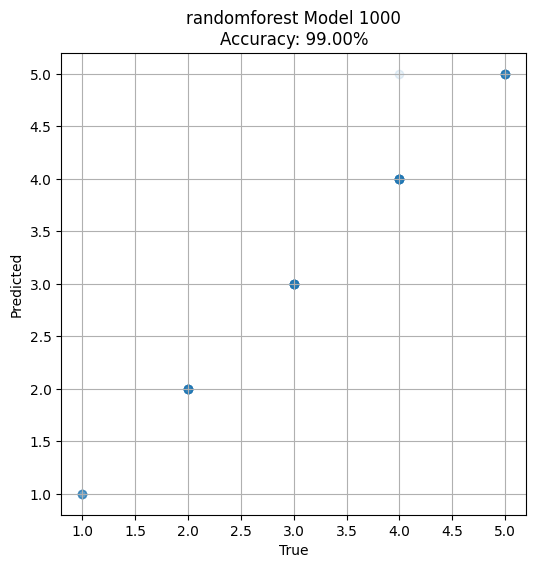

In [ ]:
# 建立隨機森林分類器
from sklearn.ensemble import RandomForestClassifier
import pickle
rf_model = RandomForestClassifier(n_estimators=300, random_state=400)

# 訓練模型
rf_model.fit(X_train, y_train)

# 預測
y_pred = rf_model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)

# 繪製散佈圖
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title(f"randomforest Model 1000\nAccuracy: {accuracy:.2%}")
plt.grid(True)

# 顯示圖表
plt.show()

#下載模型
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)


#XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:08:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

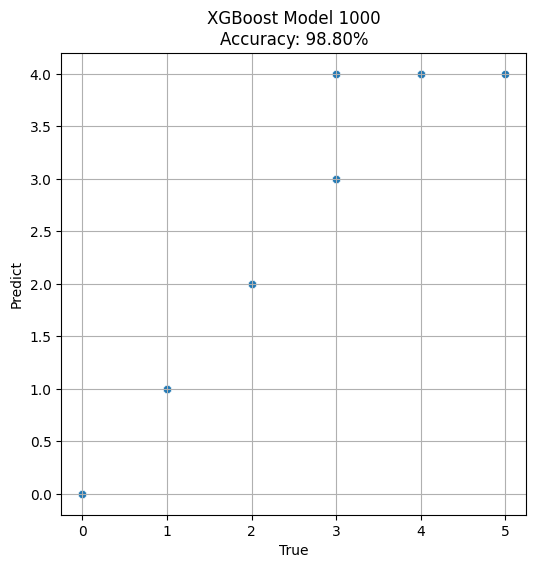

['XGB_model_1000.pkl']

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# 建立 XGBoost 分類器
y_train = y_train - 1
y_test = y_test - 1
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 預測
y_pred_xgb = xgb_model.predict(X_test)

# 評估模型
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

# 繪製 y_test vs. y_pred 相關性圖
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=1)
plt.xlabel("True")
plt.ylabel("Predict")
plt.title(f"XGBoost Model 1000\nAccuracy: {accuracy_xgb:.2%}")
plt.grid(True)
plt.show()

y_train = y_train + 1
y_test = y_test + 1

#下載模型
import joblib
joblib.dump(xgb_model, 'XGB_model_1000.pkl')

# 測試

模型準確度: 29.17%
實際值 (y_true) vs 預測值 (y_pred):
   Actual  Predicted
0       5          2
1       5          4
2       5          3
3       4          2
4       4          5


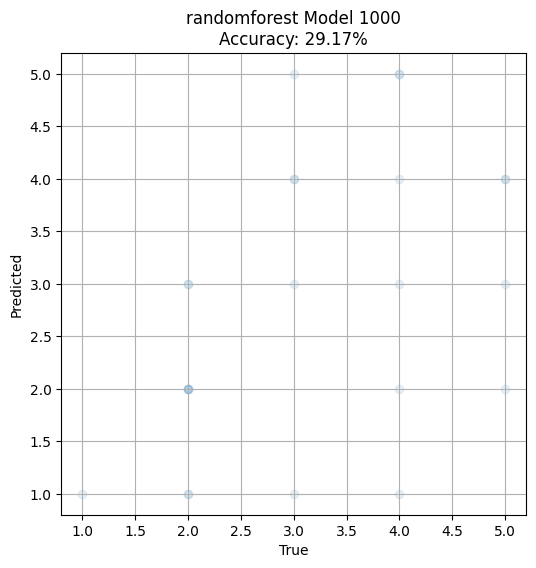

In [ ]:
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score

# 讀取測試數據
test_data = pd.read_csv("data_test.csv")

# 刪除 Unnamed: 0，因為這只是索引
test_data = test_data.drop(columns=["Unnamed: 0"], errors="ignore")

# 分離 X_test（特徵）和 y_true（實際的 score）
X_test = test_data.drop(columns=["score"], errors="ignore")  # 模型只能用這些特徵來預測
y_true = test_data["score"]  # 這是實際的標籤

# 載入模型
with open("rf_model.pkl", "rb") as f:
    model = pickle.load(f)

# 進行預測
y_pred = model.predict(X_test)

# 計算準確度
accuracy = accuracy_score(y_true, y_pred)
print(f"模型準確度: {accuracy:.2%}")

# 顯示部分預測結果
print("實際值 (y_true) vs 預測值 (y_pred):")
print(pd.DataFrame({"Actual": y_true, "Predicted": y_pred}).head())


# 顯示圖表
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.1)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title(f"randomforest Model 1000\nAccuracy: {accuracy:.2%}")
plt.grid(True)

plt.show()